In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-dog/yorkshire-terrier-ga4fe655bb_1280.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_1664.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_2846.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_3048.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_1564.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_2157.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_838.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_2138.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-coated_wheaten_terrier/n02098105_1009.jpg
/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0/soft-co

SEE LINK AT : https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#train and test data directory
data_dir = "/kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0"
# test_data_dir = "../input/intel-image-classification/seg_test/seg_test"

#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
# test_dataset = ImageFolder(test_data_dir,transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))

In [5]:
print(len(dataset))
dataset

3549


Dataset ImageFolder
    Number of datapoints: 3549
    Root location: /kaggle/input/cropped-data-dogs-sample-b20/Data_sample_B20_n0
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [6]:
# check dataset type and size
img, label = dataset[0]
print(img.shape,label)

torch.Size([3, 150, 150]) 0


In [7]:
# CHECK LABELS
print("Follwing classes are there : \n",dataset.classes)

Follwing classes are there : 
 ['Australian_terrier', 'Boston_bull', 'EntleBucher', 'Eskimo_dog', 'Rhodesian_ridgeback', 'Samoyed', 'Scotch_terrier', 'Scottish_deerhound', 'Shih-Tzu', 'Sussex_spaniel', 'Yorkshire_terrier', 'basset', 'cocker_spaniel', 'dingo', 'malamute', 'miniature_pinscher', 'papillon', 'soft-coated_wheaten_terrier', 'standard_schnauzer', 'toy_poodle']


Label : Australian_terrier


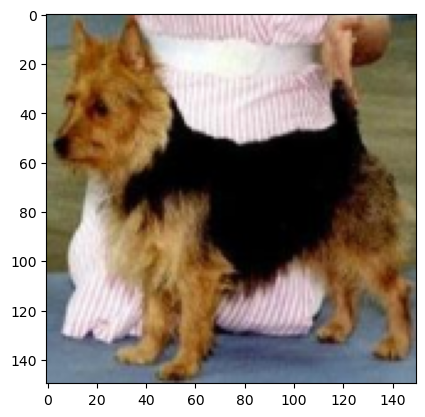

In [8]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [9]:
# # PADDING
# m = nn.ZeroPad2d(2)
# [m(dataset[im][0]) for im in range(len(dataset))]

In [10]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

In [11]:
len(dataset.targets)
# dataset.classes

3549

In [12]:
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((227,227)),transforms.ToTensor()
]))

In [13]:
VAL_SIZE = 0.15
BATCH_SIZE = 32
SEED = 42

# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(dataset)),
    dataset.targets,
    stratify=dataset.targets,
    test_size=VAL_SIZE,
    random_state=SEED
)
print(f"Length of Train indices : {len(train_indices)}")
print(f"Length of Validation indices : {len(val_indices)}")


Length of Train indices : 3016
Length of Validation indices : 533


In [14]:
# generate subset based on indices
train_split = Subset(dataset, train_indices)
val_split = Subset(dataset, val_indices)

print(f"Length of Train Data : {len(train_split)}")
print(f"Length of Validation Data : {len(val_split)}")

Length of Train Data : 3016
Length of Validation Data : 533


In [15]:
train_split

In [16]:
# create batches
train_dl = DataLoader(train_split, BATCH_SIZE, shuffle=True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_split, BATCH_SIZE*2, num_workers = 2, pin_memory = True)

In [17]:
train_dl.batch_size

32

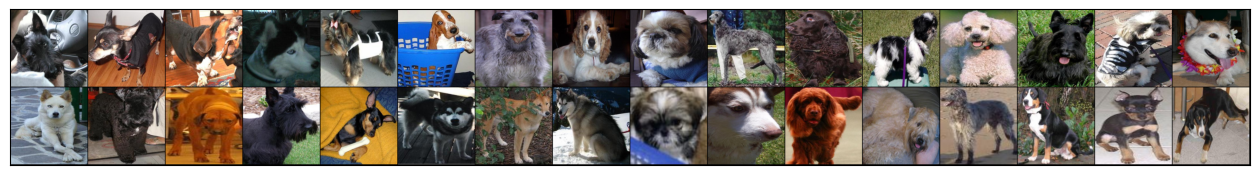

In [18]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

## Base model for image classification in pytorch

In [19]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])


In [20]:
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [22]:
class DogRaceClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,20),
#             nn.Sigmoid()
        )
    
    def forward(self, xb):
        return self.network(xb)

In [176]:
# TEST CELL
def pooling(W,F,S):
    return (W-F)/S + 1

def convoluting(W,F,P,S):
    return ((W-F+2*P)/S +1)
convoluting(227, 11, 1, 4)
# pooling(36,2,2)
convoluting(55, 3, 1, 1)
pooling(55, 3, 2)
convoluting(27, 5,1, 1)
pooling(25, 3, 2)
convoluting(12, 3, 1, 1)
pooling(12, 3, 2)
5*5*384/2

4800.0

In [23]:
class Alexnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 96, kernel_size = 11,stride=4, padding = 1),
            nn.ReLU(),
            nn.Conv2d(96,96, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
        
            nn.Conv2d(96, 256, kernel_size = 5, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256 ,256, kernel_size = 5, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
            
            nn.Conv2d(256, 384, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(384,384, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(3,2),
            
            nn.Flatten(),
            nn.Linear(9600,4800),
            nn.ReLU(),
            nn.Linear(4800,1024),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,20),
#             nn.Sigmoid()
        )
    
    def forward(self, xb):
        return self.network(xb)

In [148]:
# TEST CELL
# ?? nn.Conv2d
# ?? nn.Linear
# 82944/256
# 324/9/9
# np.power(2,10)
18*18*256
# np.sqrt(82944)
# np.power(3,4) * np.power(2,10)
# np.power(2,8)
# nn.MaxPool2d??
# 150*150*256

82944

In [24]:
model =  DogRaceClassification()
#NaturalSceneClassification()
model

DogRaceClassification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=82944, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(

In [25]:
model2=Alexnet()
# Visualizing tensor at the output of the model  (should be = (batch_size, num_classes))
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model2(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break


images.shape: torch.Size([32, 3, 227, 227])
out.shape: torch.Size([32, 20])
out[0]: tensor([-0.0221, -0.0045, -0.0044, -0.0255, -0.0306, -0.0324,  0.0468, -0.0562,
        -0.0077,  0.0138,  0.0260,  0.0352, -0.0218,  0.0039, -0.0199, -0.0043,
        -0.0030, -0.0469,  0.0231, -0.0221], grad_fn=<SelectBackward0>)


In [32]:
# load the into GPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
model2 = to_device(model2, device)
evaluate(model2, val_dl)
# fit
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.01
history = fit(num_epochs, lr, model2, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 68908.5781, val_loss: 2.9954, val_acc: 0.0644
Epoch [1], train_loss: 3.0003, val_loss: 2.9896, val_acc: 0.0644
Epoch [2], train_loss: 3.0039, val_loss: 3.0006, val_acc: 0.0643
Epoch [3], train_loss: 2.9980, val_loss: 2.9895, val_acc: 0.0643
Epoch [4], train_loss: 2.9915, val_loss: 2.9884, val_acc: 0.0643
Epoch [5], train_loss: 2.9902, val_loss: 2.9880, val_acc: 0.0643
Epoch [6], train_loss: 2.9890, val_loss: 2.9876, val_acc: 0.0643
Epoch [7], train_loss: 2.9892, val_loss: 2.9879, val_acc: 0.0643
Epoch [8], train_loss: 3.0027, val_loss: 2.9893, val_acc: 0.0643
Epoch [9], train_loss: 2.9914, val_loss: 2.9877, val_acc: 0.0644


In [33]:
lr=0.005
history = fit(num_epochs, lr, model2, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.9942, val_loss: 2.9882, val_acc: 0.0643
Epoch [1], train_loss: 2.9884, val_loss: 2.9878, val_acc: 0.0643
Epoch [2], train_loss: 2.9885, val_loss: 2.9876, val_acc: 0.0643
Epoch [3], train_loss: 2.9881, val_loss: 2.9874, val_acc: 0.0643
Epoch [4], train_loss: 2.9878, val_loss: 2.9874, val_acc: 0.0643
Epoch [5], train_loss: 2.9882, val_loss: 2.9875, val_acc: 0.0643
Epoch [6], train_loss: 2.9881, val_loss: 2.9875, val_acc: 0.0643
Epoch [7], train_loss: 2.9881, val_loss: 2.9873, val_acc: 0.0643
Epoch [8], train_loss: 2.9882, val_loss: 2.9875, val_acc: 0.0643
Epoch [9], train_loss: 2.9878, val_loss: 2.9873, val_acc: 0.0643


In [34]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');



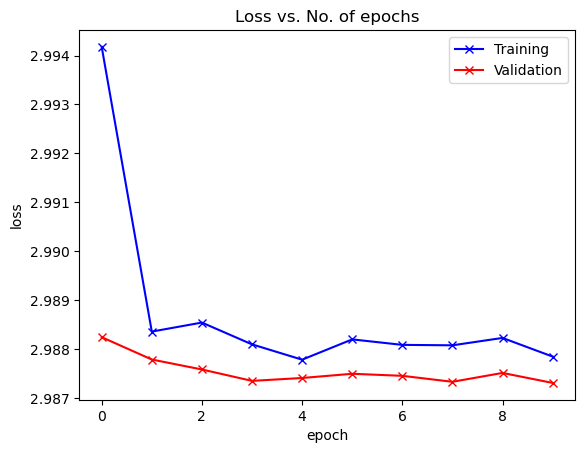

In [37]:
plot_losses(history)
plt.savefig('loss_alexnet.png')

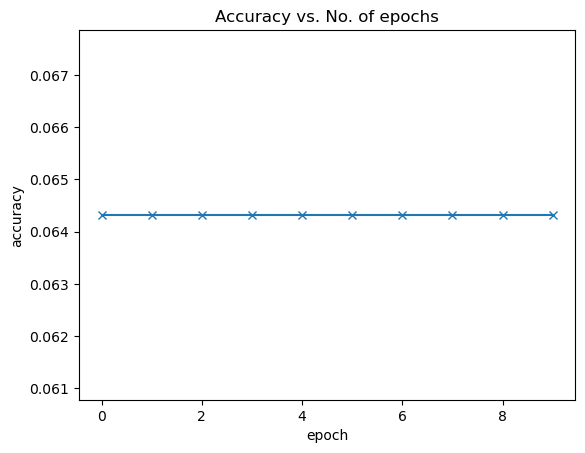

In [38]:
plot_accuracies(history)
plt.savefig('accuracy_alexnet.png')

In [28]:
for images, labels in val_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 227, 227])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x200704 and 82944x1024)

In [29]:
def get_default_device():
    """ Set Device to GPU or CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    

def to_device(data, device):
    "Move data to the device"
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking = True)

class DeviceDataLoader():
    """ Wrap a dataloader to move data to a device """
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        """ Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device)
            
    def __len__(self):
        """ Number of batches """
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [30]:
# load the into GPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

DogRaceClassification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=82944, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(

## Model Fitting

In [31]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

@torch.no_grad() #FUNCTION TO EVALUATE MODEL, NO GRADIENT CALCULATION REQUIRED
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
#     print(optimizer)
    for epoch in range(epochs):
#         print(epoch)
        model.train()
        train_losses = []
        for batch in train_loader:
#             print(batch)
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [28]:
#load the model to the device
model = to_device(NaturalSceneClassification(),device)

In [29]:
# [x for x in dir (train_dl_Device) if not x.startswith('_')]
model

NaturalSceneClassification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=82944, out_features=1024, bias=True)
    (17): ReLU()
    (18): Li

In [30]:
evaluate(model, val_dl)

{'val_loss': 2.995328426361084, 'val_acc': 0.0399305559694767}

In [31]:
val_dl

In [32]:
#set the no. of epochs, optimizer funtion and learning rate
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.01

In [33]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 660.5732, val_loss: 2.9892, val_acc: 0.0643
Epoch [1], train_loss: 2.9903, val_loss: 2.9874, val_acc: 0.0643
Epoch [2], train_loss: 2.9893, val_loss: 2.9871, val_acc: 0.0643
Epoch [3], train_loss: 2.9893, val_loss: 2.9871, val_acc: 0.0643
Epoch [4], train_loss: 2.9891, val_loss: 2.9871, val_acc: 0.0643
Epoch [5], train_loss: 2.9890, val_loss: 2.9877, val_acc: 0.0643
Epoch [6], train_loss: 2.9893, val_loss: 2.9870, val_acc: 0.0643
Epoch [7], train_loss: 2.9888, val_loss: 2.9873, val_acc: 0.0643
Epoch [8], train_loss: 2.9889, val_loss: 2.9873, val_acc: 0.0643
Epoch [9], train_loss: 2.9895, val_loss: 2.9872, val_acc: 0.0643


# Plot results

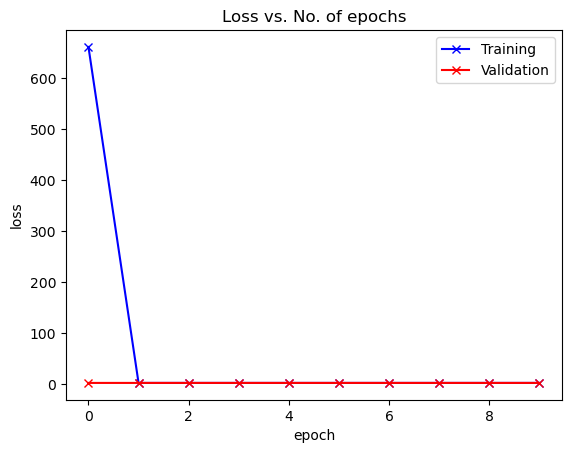

In [34]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)


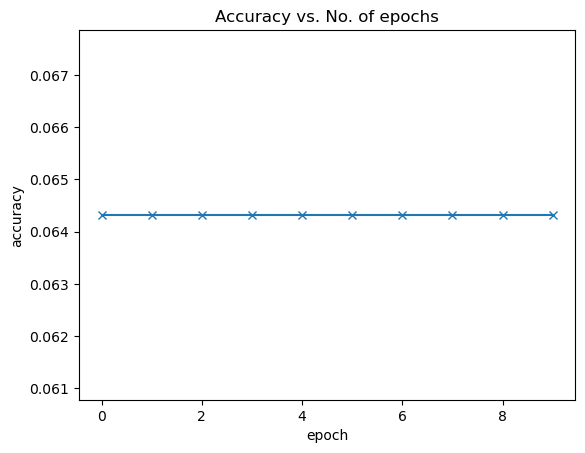

In [35]:
plot_accuracies(history)

--------------------------------------------------------------

In [36]:
#save the model
torch.save(model.state_dict(), 'natural-scene-classification.pth')#save the model

# Predict 

In [37]:
def predict_img_class(img,model):
    """ Predict the class of image and Return Predicted Class"""
    img = to_device(img.unsqueeze(0), device)
    prediction =  model(img)
    _, preds = torch.max(prediction, dim = 1)
    return dataset.classes[preds[0].item()]

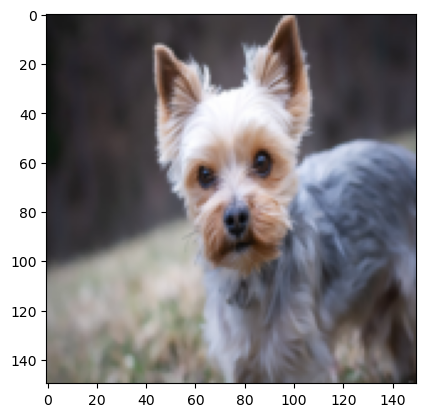

In [38]:
from PIL import Image

#open image file
img = Image.open("/kaggle/input/new-dog/yorkshire-terrier-ga4fe655bb_1280.jpg")
#Redefine tranform
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Specify the new dimensions for the image
    transforms.ToTensor()  # Convert the image to a tensor
])
#convert image to tensor
img = transform(img)

#print image
plt.imshow(img.permute(1,2,0))



In [39]:
#prdict image label
print('Correct class: Yorkshire terrier\n',f"Predicted Class : {predict_img_class(img,model)}")

Correct class: Yorkshire terrier
 Predicted Class : Scottish_deerhound
